## Lab for K-Means clustering

#### Motivation
In this lab, you will apply K-Means clustering to an unlabeled dataset derived from the Breast Cancer Wisconsin Diagnostic dataset. This lab focuses on using clustering to group data points and evaluate the effectiveness of the clusters.

#### By completing the steps, you will:

* Prepare the dataset for clustering.
* Determine the optimal number of clusters using the Elbow Method.
* Perform K-Means clustering and evaluate its quality using the Silhouette Score.
* Visualize clusters using Principal Component Analysis (PCA).
* Compare predicted clusters to actual labels to assess model effectiveness.

### Step 0: Load and Prepare the Dataset (Provided)

The code for this step is already given to you. It performs the following:

* Imports necessary libraries such as pandas, numpy, matplotlib, seaborn, sklearn.cluster.KMeans, and others.
* Loads the Breast Cancer dataset from sklearn.datasets.load_breast_cancer().
* Creates a DataFrame containing the features.
* Removes the labels from the dataset, as clustering is an unsupervised learning task.


No modifications are needed for this step.

In [11]:
# CodeGrade step0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer


In [12]:
# CodeGrade step0

# Load dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Remove labels (unsupervised learning)
df_unlabeled = df.copy()


### Step 1: Rescale the Data
Objective: Standardize the dataset before applying K-Means.

Instructions
* Use StandardScaler from sklearn.preprocessing to normalize all features.
* Fit the scaler to the dataset and transform it into a new variable called df_scaled.
* Ensure that df_scaled retains the same shape as the original data.

In [13]:
# CodeGrade step1

# Rescale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Shape
df_scaled.shape


(569, 30)

### Step 2: Determine the Optimal Number of Clusters (Elbow Method)

Objective: Use the Elbow Method to identify the best value for K.

Instructions
* Initialize an empty list wcss (Within-Cluster Sum of Squares).
* Loop over values of K from 1 to 9:
  * Train a KMeans model with the current k, random_state=42, and n_init=10.
  * Fit the model to df_scaled and store the inertia (WCSS) in wcss.
* Calculate and return the mean WCSS.


In [14]:
# CodeGrade step2

# WCSS

wcss = []

# for loop
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Mean of WCSS
np.mean(wcss)

9571.945762124911

Plot the Elbow Method graph:
* X-axis: Number of clusters (K).
* Y-axis: WCSS values.
* Use markers ('o') and a line ('-').

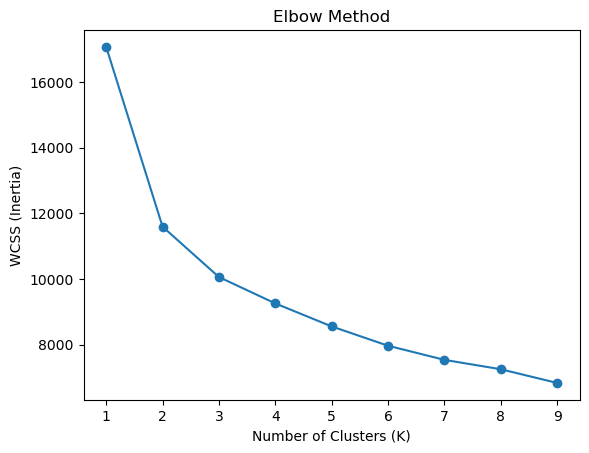

In [15]:
# Plot Elbow Method
plt.plot(range(1, 10), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.show()


### Step 3: Perform K-Means Clustering

Objective: Apply K-Means clustering using the best K from the Elbow Method.

Instructions
* Set optimal_k (determined from the previous step).
* Train a KMeans model with optimal_k, random_state=42, and n_init=10.
* Assign cluster labels to df_unlabeled["Cluster"].
* Compute the Silhouette Score to measure clustering quality.
* Return the Silhouette Score rounded to 4 decimal places.


In [16]:
# CodeGrade step3

# Optimal k
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)
df_unlabeled["Cluster"] = cluster_labels

# Silhouette Average
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Round
round(silhouette_avg, 4)

0.3434

### Step 4: Visualize Clusters with PCA
Objective: Reduce dimensions and visualize the clusters.

Instructions
* Apply PCA (Principal Component Analysis) to reduce df_scaled to two dimensions (n_components=2).
* Store the transformed dataset in df_pca.
* Return the maximum absolute value in df_pca, rounded to 0 decimal places.

In [17]:
# CodeGrade step4

# PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

# Max pca
np.round(np.max(np.abs(df_pca)), 0)

16.0

Create a scatter plot of the two PCA components:
* X-axis: Principal Component 1.
* Y-axis: Principal Component 2.
* Color the points based on their assigned cluster.
* Use cmap='viridis', marker 'o', and edgecolor='k'.
* Add a color bar for cluster labels.

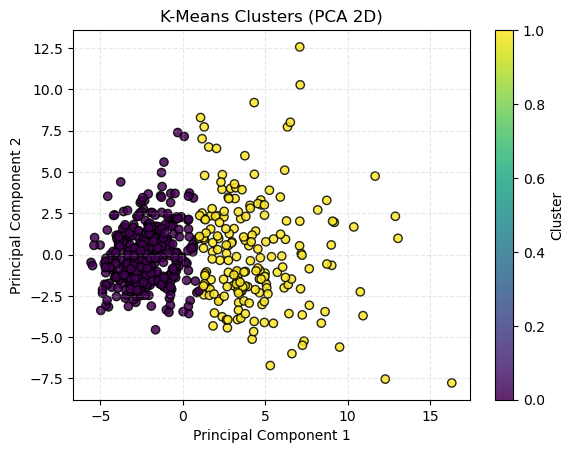

In [18]:
# Scatter plot
labels = df_unlabeled["Cluster"].values if "Cluster" in df_unlabeled.columns else cluster_labels

plt.figure()
sc = plt.scatter(df_pca[:, 0], df_pca[:, 1],
                 c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.85)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA 2D)")
cbar = plt.colorbar(sc)
cbar.set_label("Cluster")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Step 5: Compare Clusters to Actual Labels
Objective: Compare predicted clusters to the actual class labels.

Instructions
* Create a new column in df called "Predicted_Cluster" and assign it the cluster labels.
* Add a column "Actual_Label" using cancer.target, where:
  * 0 = Malignant
  * 1 = Benign
* Print the value counts of the unique combinations of "Actual_Label" and "Predicted_Cluster", returning its shape.

In [19]:
# CodeGrade step5

# Clusters

df["Predicted_Cluster"] = cluster_labels
df["Actual_Label"] = cancer.target   # 0 = Malignant, 1 = Benign

# Return cluster comparison
df.groupby(["Actual_Label", "Predicted_Cluster"]).size()

Actual_Label  Predicted_Cluster
0             0                     36
              1                    176
1             0                    339
              1                     18
dtype: int64